<a href="https://colab.research.google.com/github/ReyhaneNikoobayan/violence-Detection/blob/main/cnn_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import os
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
from tqdm import tqdm

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Update paths to your dataset in Google Drive
violence = '/content/drive/My Drive/RLVS/Real Life Violence Dataset/Violence'
non_violence = '/content/drive/MyDrive/RLVS/Real Life Violence Dataset/NonViolence'

# 3. Function to read exactly 50 evenly spaced frames from each video
def read_videos_from_folder(folder_path, label):
    videos = []
    labels = []
    for filename in tqdm(os.listdir(folder_path)):
        if filename.endswith(".mp4"):
            video_path = os.path.join(folder_path, filename)
            cap = cv2.VideoCapture(video_path)
            frames = []
            total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            if total_frames < 30:
                print(f"Skipping {filename}: only {total_frames} frames.")
                cap.release()
                continue
            frame_indices = [int(i * total_frames / 30) for i in range(30)]
            frame_count = 0
            index_set = set(frame_indices)
            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break
                if frame_count in index_set:
                    resized_frame = cv2.resize(frame, (128, 128))
                    frames.append(resized_frame)
                    if len(frames) == 30:
                        break
                frame_count += 1
            cap.release()
            if len(frames) == 30:
                videos.append(frames)
                labels.append(label)
            else:
                print(f"Skipped {filename}: collected {len(frames)} frames.")
    return videos, labels

# 4. Read videos
videos_violence_RLVS, labels_violence_RLVS = read_videos_from_folder(violence, 'violence')
videos_non_violence_RLVS, labels_non_violence_RLVS = read_videos_from_folder(non_violence, 'non_violence')

# 5. Combine and summarize
all_videos_RLVS = videos_violence_RLVS + videos_non_violence_RLVS
all_labels_RLVS = labels_violence_RLVS + labels_non_violence_RLVS

print(f"✅ Total videos RLVS loaded: {len(all_videos_RLVS)}")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


  7%|▋         | 69/1000 [00:16<00:33, 27.75it/s]

Skipping NV_940.mp4: only 29 frames.


100%|██████████| 1000/1000 [01:39<00:00, 10.05it/s]

✅ Total videos RLVS loaded: 1835


In [ ]:
import cv2
import os
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
from tqdm import tqdm

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Update paths to your dataset in Google Drive
train_violence = '/content/drive/My Drive/RWF2000/RWF-2000/train/Fight'
train_non_violence='/content/drive/My Drive/RWF2000/RWF-2000/train/NonFight'
val_violence= '/content/drive/My Drive/RWF2000/RWF-2000/val/Fight'
val_non_violence = '/content/drive/My Drive/RWF2000/RWF-2000/val/NonFight'

# 3. Function to read exactly 30 evenly spaced frames from each video
def read_videos_from_folder(folder_path, label):
    videos = []
    labels = []
    for filename in tqdm(os.listdir(folder_path)):
        if filename.endswith(".avi"):
            video_path = os.path.join(folder_path, filename)
            cap = cv2.VideoCapture(video_path)
            frames = []
            total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            if total_frames < 30:
                print(f"Skipping {filename}: only {total_frames} frames.")
                cap.release()
                continue
            frame_indices = [int(i * total_frames / 30) for i in range(30)]
            frame_count = 0
            index_set = set(frame_indices)
            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break
                if frame_count in index_set:
                    resized_frame = cv2.resize(frame, (128, 128))
                    frames.append(resized_frame)
                    if len(frames) == 30:
                        break
                frame_count += 1
            cap.release()
            if len(frames) == 30:
                videos.append(frames)
                labels.append(label)
            else:
                print(f"Skipped {filename}: collected {len(frames)} frames.")
    return videos, labels

# 4. Read videos
videos_violence_RWF_train, labels_violence_RWF_train = read_videos_from_folder(train_violence, 'violence')
videos_non_violence_RWF_train, labels_non_violence_RWF_train = read_videos_from_folder(train_non_violence, 'non_violence')

videos_violence_RWF_val, labels_violence_RWF_val = read_videos_from_folder(val_violence, 'violence')
videos_non_violence_RWF_val, labels_non_violence_RWF_val = read_videos_from_folder(val_non_violence, 'non_violence')


# 5. Combine and summarize
all_videos_train_RWF = videos_violence_RWF_train + videos_non_violence_RWF_train
all_labels_train_RWF = labels_violence_RWF_train+ labels_non_violence_RWF_train

all_videos_val_RWF = videos_violence_RWF_val + videos_non_violence_RWF_val
all_labels_val_RWF= labels_violence_RWF_val+ labels_non_violence_RWF_val

print(f"✅ Total RwF train_videos loaded: {len(all_videos_train_RWF)}")
print(f"✅ Total RWF val_videos loaded: {len(all_videos_val_RWF)}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


100%|██████████| 200/200 [01:27<00:00,  2.29it/s]

✅ Total RwF train_videos loaded: 1599
✅ Total RWF val_videos loaded: 400


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Assume you have your labels in a list or array
# For example, labels could be something like this:
# all_labels = ['violence', 'non-violence', 'violence', ...]

# Convert your video list and label list to numpy arrays for easier splitting
all_videos_RLVS = np.array(all_videos_RLVS)
all_videos_train_RWF= np.array(all_videos_train_RWF)
all_videos_val_RWF = np.array(all_videos_val_RWF)

all_labels_RLVS = np.array(all_labels_RLVS)  # Use the string labels
all_labels_train_RWF = np.array(all_labels_train_RWF)
all_labels_val_RWF= np.array(all_labels_val_RWF)




# Encode the string labels to integer labels
label_encoder = LabelEncoder()

all_labels_RLVS_encoded = label_encoder.fit_transform(all_labels_RLVS)
all_labels_train_RWF_encoded = label_encoder.fit_transform(all_labels_train_RWF)
all_labels_val_RWF_encoded = label_encoder.fit_transform(all_labels_val_RWF)



# Split into training (80%) and val (20%)
all_videos_train_RLVS, all_videos_val_RLVS, all_labels_train_RLVS,all_labels_val_RLVS = train_test_split(
    all_videos_RLVS, all_labels_RLVS_encoded, test_size=0.2, random_state=42, shuffle=True)



print(f"Training videos RLVS: {len(all_videos_train_RLVS)}")
print(f"Validation videos RLVS: {len(all_videos_val_RLVS)}")

print(f"Training videos RWF: {len(all_videos_train_RWF)}")
print(f"Validation videos RWF: {len(all_videos_val_RWF)}")






Training videos RLVS: 1468
Validation videos RLVS: 367
Training videos RWF: 1599
Validation videos RWF: 400


In [ ]:
import numpy as np
from sklearn.utils import shuffle

# Combine training sets
combined_videos_train = np.concatenate((all_videos_train_RLVS, all_videos_train_RWF))
combined_labels_train = np.concatenate((all_labels_train_RLVS, all_labels_train_RWF_encoded))  # Make sure both are encoded

# Combine validation sets
combined_videos_val = np.concatenate((all_videos_val_RLVS, all_videos_val_RWF))
combined_labels_val = np.concatenate((all_labels_val_RLVS, all_labels_val_RWF_encoded))  # Make sure both are encoded

# Shuffle training data
x_train, labels_train = shuffle(combined_videos_train, combined_labels_train, random_state=42)

# Shuffle validation data
x_val, labels_val = shuffle(combined_videos_val, combined_labels_val, random_state=42)

# Check sizes
print(f"Total training videos: {len(x_train)}")
print(f"Total validation videos: {len(x_val)}")


Total training videos: 3067
Total validation videos: 767


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

class VideoDataset(Dataset):
    def __init__(self, videos, labels):
        self.videos = videos
        self.labels = labels

    def __len__(self):
        return len(self.videos)

    def __getitem__(self, idx):
        video = self.videos[idx]
        label = self.labels[idx]
        video = video / 255.0
        # Convert to tensors
        video = torch.tensor(video, dtype=torch.float32)
        label = torch.tensor(label, dtype=torch.long)
        return video, label

# Create datasets
train_dataset = VideoDataset(x_train, labels_train)
val_dataset = VideoDataset(x_val, labels_val)
test_dataset_RLVS = VideoDataset(all_videos_val_RLVS, all_labels_val_RLVS)
test_dataset_RWF = VideoDataset(all_videos_val_RWF, all_labels_val_RWF_encoded)

# Create data loaders
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader_RLVS = DataLoader(test_dataset_RLVS, batch_size=batch_size, shuffle=False)
test_loader_RWF= DataLoader(test_dataset_RWF, batch_size=batch_size, shuffle=False)

# Print the sizes of the datasets
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size RLVS: {len(test_dataset_RLVS)}")
print(f"Test set size RWF: {len(test_dataset_RWF)}")

# Example of iterating through the data loader
for videos, labels in train_loader:
    print(videos.shape, labels.shape)
    break


Training set size: 3067
Validation set size: 767
Test set size RLVS: 367
Test set size RWF: 400
torch.Size([32, 30, 128, 128, 3]) torch.Size([32])


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim
from torch.utils.data import DataLoader

class CNNLSTM(nn.Module):
    def __init__(self, cnn_out_dim=512, hidden_dim=256, lstm_layers=1, dropout_p=0.5):
        super(CNNLSTM, self).__init__()
        self.cnn_out_dim = cnn_out_dim
        self.hidden_dim = hidden_dim
        self.lstm_layers = lstm_layers

        # Pretrained CNN (ResNet18)
        self.cnn = models.resnet18(pretrained=True)
        self.cnn = nn.Sequential(*list(self.cnn.children())[:-2])  # Remove last two layers

        # Freeze all CNN layers
        for param in self.cnn.parameters():
            param.requires_grad = True

        self.cnn_fc = nn.Linear(512 * 4 * 4, cnn_out_dim)
        self.cnn_cls_head = nn.Linear(cnn_out_dim, 1)

        # Dropout layer
        self.dropout = nn.Dropout(p=dropout_p)

        # LSTM for temporal modeling
        self.lstm = nn.LSTM(input_size=cnn_out_dim, hidden_size=hidden_dim,
                            num_layers=lstm_layers, batch_first=True)

        self.fc = nn.Linear(hidden_dim, 1)

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        batch_size, timesteps, C, H, W = x.size()
        c_out = torch.zeros(batch_size, timesteps, self.cnn_out_dim).to(x.device)

        for t in range(timesteps):
            frame = x[:, t, :, :, :].permute(0, 3, 1, 2)  # (B, C, H, W)
            cnn_feat = self.cnn(frame)
            cnn_feat = cnn_feat.reshape(batch_size, -1)
            cnn_feat = self.cnn_fc(cnn_feat)
            cnn_feat = self.dropout(cnn_feat)  # Dropout after CNN fc
            c_out[:, t, :] = cnn_feat

        # CNN Head output (optional)
        cnn_logits_seq = self.cnn_cls_head(c_out)       # (B, T, 1)
        cnn_preds = self.sigmoid(cnn_logits_seq).squeeze(-1)  # (B, T)
        cnn_video_pred = torch.mean(cnn_preds, dim=1)         # (B,)

        # LSTM
        lstm_out, _ = self.lstm(c_out)
        lstm_last = lstm_out[:, -1, :]
        lstm_last = self.dropout(lstm_last)  # Dropout after LSTM
        lstm_pred = self.sigmoid(self.fc(lstm_last)).squeeze(-1)  # (B,)

        return cnn_video_pred, lstm_pred


num_epochs = 10
train_losses=[]
train_accuracies = []
val_losses = []
val_accuracies = []


num_classes = len(np.unique(labels_train))
model = CNNLSTM()
model = model.to('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)

#optimizer = optim.Adam(model.parameters(), lr=0.0001)

best_tes_accuracy = 0.0
save_path = 'content/drive/My drive/best_model.pth'
patience = 10  # Stop if no improvement after 5 epochs
epochs_no_improve = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for videos, labels in train_loader:
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        videos, labels = videos.to(device), labels.to(device)

        optimizer.zero_grad()
        cnn_out, lstm_out = model(videos)


        loss=criterion(0.3*cnn_out+0.7*lstm_out, labels.float())
        """
        # Losses from both CNN and LSTM
        loss_cnn = criterion(cnn_out, labels.float())
        loss_lstm = criterion(lstm_out, labels.float())
        loss = loss_cnn + loss_lstm  # or weighted: 0.4*loss_cnn + 0.6*loss_lstm
        """
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * videos.size(0)

        predicted = (0.3 * cnn_out + 0.7 * lstm_out > 0.5).float()
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    train_accuracy = correct_train / total_train
    train_losses.append(epoch_loss)
    train_accuracies.append(train_accuracy)

    # Validation
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for videos, labels in test_loader_RLVS:
            videos, labels = videos.to(device), labels.to(device)

            cnn_out, lstm_out = model(videos)

            loss=criterion(0.3*cnn_out+0.7*lstm_out, labels.float())
            """
            loss_cnn = criterion(cnn_out, labels.float())
            loss_lstm = criterion(lstm_out, labels.float())
            loss = loss_cnn + loss_lstm
            """
            val_loss += loss.item() * videos.size(0)

            predicted = (0.3 * cnn_out + 0.7 * lstm_out>0.5).float()
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss = val_loss / len(test_loader_RLVS.dataset)
    val_accuracy = correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Training Accuracy: {train_accuracy:.4f}, Test RLVS Loss: {val_loss:.4f}, Test RLVS Accuracy: {val_accuracy:.4f}')


    tes_loss = 0.0
    correct_tes = 0
    total_tes = 0
    with torch.no_grad():
        for videos, labels in test_loader_RWF:
            videos, labels = videos.to('cuda' if torch.cuda.is_available() else 'cpu'), labels.to('cuda' if torch.cuda.is_available() else 'cpu')

            cnn_out, lstm_out = model(videos)

            loss=criterion(0.3*cnn_out+0.7*lstm_out, labels.float())
            """
            loss_cnn = criterion(cnn_out, labels.float())
            loss_lstm = criterion(lstm_out, labels.float())
            loss = loss_cnn + loss_lstm
            """
            tes_loss +=loss.item() * videos.size(0)

            predicted = ( 0.3 * cnn_out + 0.7 * lstm_out> 0.5).float()
            total_tes += labels.size(0)
            correct_tes += (predicted == labels).sum().item()

    tes_loss = tes_loss / len(test_loader_RWF.dataset)
    tes_accuracy = correct_tes / total_tes



    print(f'Epoch {epoch+1}/{num_epochs}, Test RWF Loss: {tes_loss:.4f}, Test RWF Accuracy: {tes_accuracy:.4f}')
        # Save model if tes_accuracy improves
    if epoch==10:
        best_tes_accuracy = val_accuracy
        torch.save(model.state_dict(), '/content/drive/MyDrive/best_model.pth')
        print(f'✅ Best model saved with RLVS accuracy: {best_tes_accuracy:.4f}')
        epochs_no_improve = 0  # reset counter
    """
    else:
        epochs_no_improve += 1
        print(f'⚠️ No improvement in RLVS accuracy for {epochs_no_improve} epoch(s)')

    # Early stopping condition
    if epochs_no_improve >= patience:
        print(f'🛑 Early stopping: no improvement in {patience} consecutive epochs.')
        break
    """
    if val_accuracy>0.98:
        break



# ✅ Save model at last epoch
torch.save(model.state_dict(), '/content/drive/MyDrive/last_model.pth')
print("💾 Last model saved at final epoch.")


Epoch 1/10, Loss: 0.4747, Training Accuracy: 0.7871, Test RLVS Loss: 0.1659, Test RLVS Accuracy: 0.9373
Epoch 1/10, Test RWF Loss: 0.6164, Test RWF Accuracy: 0.6900
Epoch 2/10, Loss: 0.2411, Training Accuracy: 0.9136, Test RLVS Loss: 0.1649, Test RLVS Accuracy: 0.9373
Epoch 2/10, Test RWF Loss: 0.6827, Test RWF Accuracy: 0.7000
Epoch 3/10, Loss: 0.1554, Training Accuracy: 0.9475, Test RLVS Loss: 0.1117, Test RLVS Accuracy: 0.9591
Epoch 3/10, Test RWF Loss: 0.7239, Test RWF Accuracy: 0.7625
Epoch 4/10, Loss: 0.1226, Training Accuracy: 0.9609, Test RLVS Loss: 0.1557, Test RLVS Accuracy: 0.9292
Epoch 4/10, Test RWF Loss: 0.7491, Test RWF Accuracy: 0.7050
Epoch 5/10, Loss: 0.0735, Training Accuracy: 0.9752, Test RLVS Loss: 0.0840, Test RLVS Accuracy: 0.9673
Epoch 5/10, Test RWF Loss: 0.8156, Test RWF Accuracy: 0.7450
Epoch 6/10, Loss: 0.0571, Training Accuracy: 0.9857, Test RLVS Loss: 0.1992, Test RLVS Accuracy: 0.9292
Epoch 6/10, Test RWF Loss: 1.2619, Test RWF Accuracy: 0.6600
Epoch 7/10

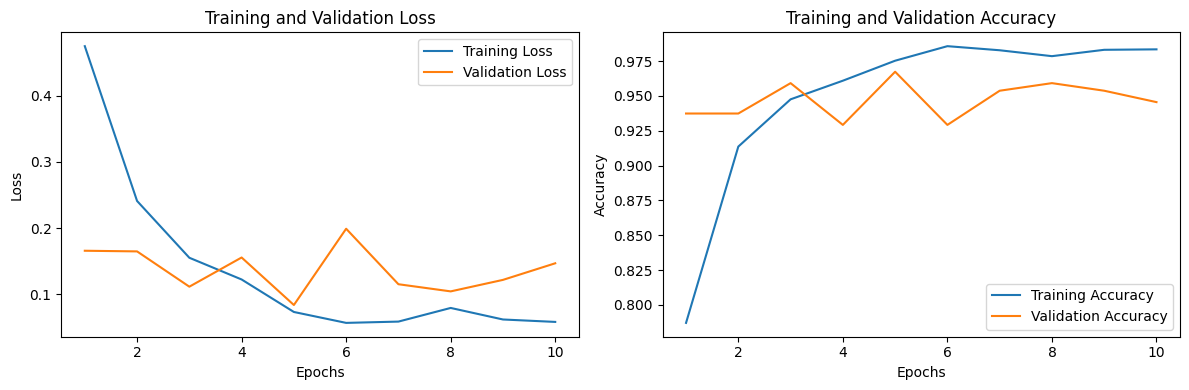

In [ ]:
import matplotlib.pyplot as plt

# Plotting
epochs = range(1, num_epochs+1 )

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
import torch
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim
from torch.utils.data import DataLoader


drive.mount('/content/drive')
# 1. Define the CNNLSTM class (same as during training)
class CNNLSTM(nn.Module):
    def __init__(self, cnn_out_dim=512, hidden_dim=256, lstm_layers=1, dropout_p=0.5):
        super(CNNLSTM, self).__init__()
        self.cnn_out_dim = cnn_out_dim
        self.hidden_dim = hidden_dim
        self.lstm_layers = lstm_layers

        self.cnn = models.resnet18(pretrained=True)
        self.cnn = nn.Sequential(*list(self.cnn.children())[:-2])
        for param in self.cnn.parameters():
            param.requires_grad = True

        self.cnn_fc = nn.Linear(512 * 4 * 4, cnn_out_dim)
        self.cnn_cls_head = nn.Linear(cnn_out_dim, 1)

        self.dropout = nn.Dropout(p=dropout_p)
        self.lstm = nn.LSTM(input_size=cnn_out_dim, hidden_size=hidden_dim,
                            num_layers=lstm_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        batch_size, timesteps, C, H, W = x.size()
        c_out = torch.zeros(batch_size, timesteps, self.cnn_out_dim).to(x.device)

        for t in range(timesteps):
            frame = x[:, t, :, :, :].permute(0, 3, 1, 2)
            cnn_feat = self.cnn(frame)
            cnn_feat = cnn_feat.reshape(batch_size, -1)
            cnn_feat = self.cnn_fc(cnn_feat)
            cnn_feat = self.dropout(cnn_feat)
            c_out[:, t, :] = cnn_feat

        cnn_logits_seq = self.cnn_cls_head(c_out)
        cnn_preds = self.sigmoid(cnn_logits_seq).squeeze(-1)
        cnn_video_pred = torch.mean(cnn_preds, dim=1)

        lstm_out, _ = self.lstm(c_out)
        lstm_last = lstm_out[:, -1, :]
        lstm_last = self.dropout(lstm_last)
        lstm_pred = self.sigmoid(self.fc(lstm_last)).squeeze(-1)

        return cnn_video_pred, lstm_pred

drive.mount('/content/drive')

# 2. Initialize model instance
model = CNNLSTM()
model.load_state_dict(torch.load('/content/drive/My Drive/last_model.pth'))
model = model.to('cuda' if torch.cuda.is_available() else 'cpu')
model.eval()


Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 254MB/s]


CNNLSTM(
  (cnn): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

total_params = count_parameters(model)
print(f"Total trainable parameters: {total_params:,}")

def get_model_size(model):
    param_size = 0
    for param in model.parameters():
        param_size += param.nelement() * param.element_size()
    buffer_size = 0
    for buffer in model.buffers():
        buffer_size += buffer.nelement() * buffer.element_size()
    size_all_mb = (param_size + buffer_size) / 1024**2
    return size_all_mb

model_size_mb = get_model_size(model)
print(f"Model size: {model_size_mb:.2f} MB")

Total trainable parameters: 16,160,578
Model size: 61.68 MB


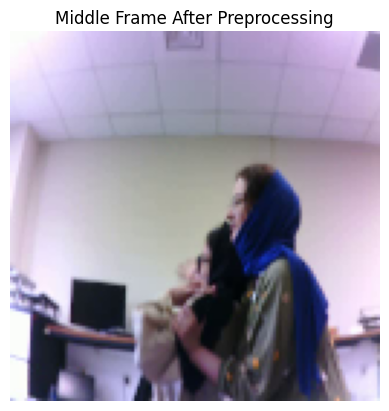

Predicted Label: violence, Probability: 0.9485


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Function to preprocess the video
def preprocess_video(video_path, frame_count=30, frame_size=(128, 128)):
    cap = cv2.VideoCapture(video_path)
    frames = []
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_indices = [int(i * total_frames / frame_count) for i in range(frame_count)]
    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if frame_count in frame_indices:
            resized_frame = cv2.resize(frame, frame_size)
            frames.append(resized_frame)
        frame_count += 1
    cap.release()
    if len(frames) != 30:
       raise ValueError(f"Video {video_path} does not have 30 frames after sampling. Found {len(frames)} frames.")

       # Show the 15th frame (middle one)
    mid_frame = frames[14]
    plt.imshow(cv2.cvtColor(mid_frame, cv2.COLOR_BGR2RGB))
    plt.title("Middle Frame After Preprocessing")
    plt.axis('off')
    plt.show()

    frames = np.array(frames)
    frames = frames / 255.0  # Normalize the frames
    frames = torch.tensor(frames, dtype=torch.float32)
    return frames.unsqueeze(0)  # Add batch dimension

def predict(video_path, model):
    model.eval()
    video = preprocess_video(video_path)
    video = video.to('cuda' if torch.cuda.is_available() else 'cpu')
    with torch.no_grad():
        cnn_out, lstm_out = model(video)

        probability_violence= (0.3 * cnn_out + 0.7 * lstm_out).float()

        label = 'violence' if probability_violence > 0.5 else 'non_violence'
        probability_non_violence = 1 - probability_violence
        if probability_violence > probability_non_violence:
          return 'violence', probability_violence
        else:
          return 'non_violence',  probability_non_violence



    if label=='violence':
        return 'violence', probability_violence
    else:
        return 'non_violence', probability_non_violence

# Example usage
video_path = '/content/drive/My Drive/test/captured_video3.mp4'  # Replace with your video path
predicted_label, probability = predict(video_path, model,)
print(f"Predicted Label: {predicted_label}, Probability: {probability.item():.4f}")



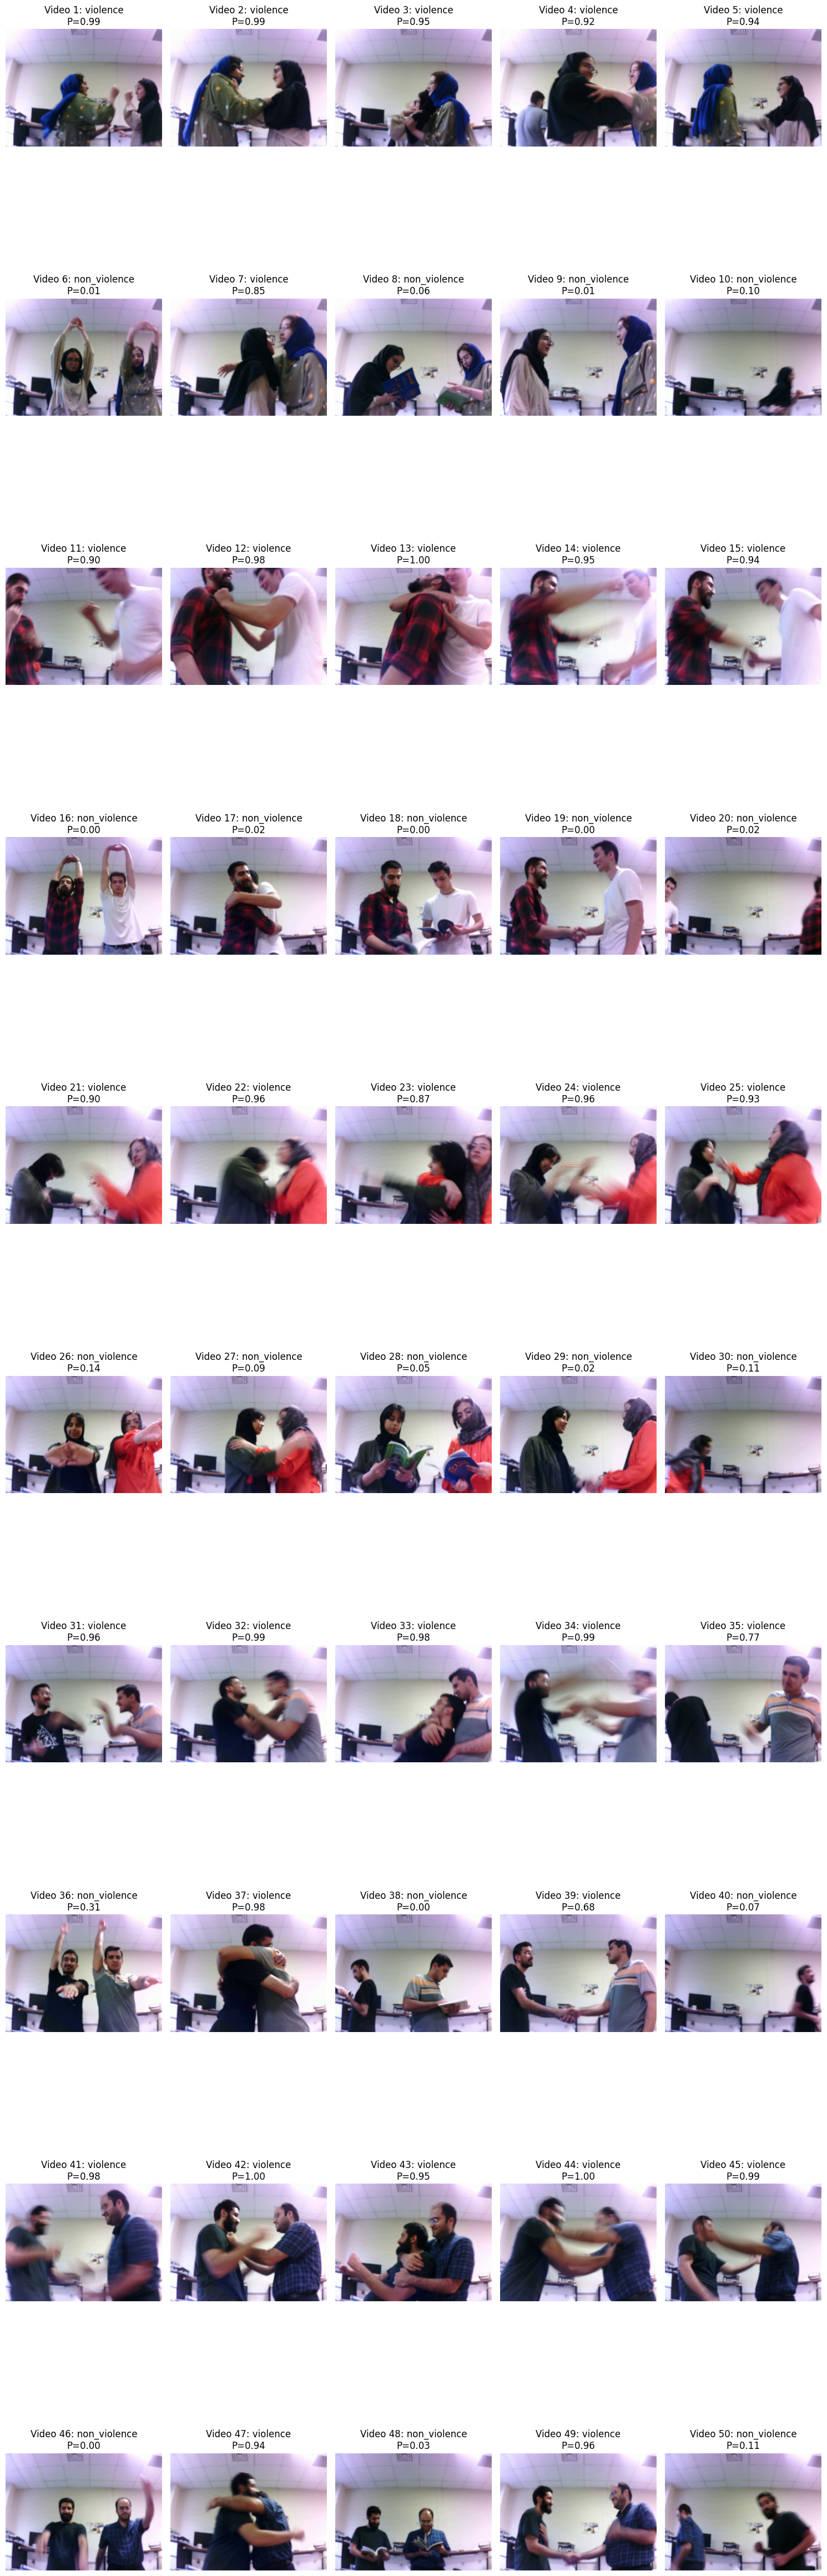

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
import os

# Preprocess a video and return tensor + one frame for visualization
def preprocess_video(video_path, frame_count=30, frame_size=(128, 128)):
    cap = cv2.VideoCapture(video_path)
    frames = []
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_indices = [int(i * total_frames / frame_count) for i in range(frame_count)]
    frame_counter = 0
    mid_frame = None
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if frame_counter in frame_indices:
            resized_frame = cv2.resize(frame, frame_size)
            frames.append(resized_frame)
            if frame_counter == frame_indices[14]:  # Store middle frame
                mid_frame = frame
        frame_counter += 1
    cap.release()

    if len(frames) != frame_count:
        raise ValueError(f"Video {video_path} does not have {frame_count} frames after sampling. Found {len(frames)} frames.")

    frames = np.array(frames) / 255.0  # Normalize
    frames = torch.tensor(frames, dtype=torch.float32).unsqueeze(0)  # Add batch dim
    return frames, mid_frame

# Predict the class of a video
def predict(video_path, model):
    model.eval()
    video_tensor, frame = preprocess_video(video_path)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    video_tensor = video_tensor.to(device)
    model = model.to(device)

    with torch.no_grad():
        cnn_out, lstm_out = model(video_tensor)
        probability_violence = (0.3 * cnn_out + 0.7 * lstm_out).float()
        label = 'violence' if probability_violence > 0.5 else 'non_violence'
    return label, probability_violence.item(), frame

# Plot results for 50 videos
video_dir = '/content/drive/My Drive/test/'
plt.figure(figsize=(15, 50))

for i in range(1, 51):
    video_path = os.path.join(video_dir, f'captured_video{i}.mp4')
    try:
        label, prob, frame = predict(video_path, model)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        plt.subplot(10, 5, i)
        plt.imshow(frame_rgb)
        plt.title(f'Video {i}: {label}\nP={prob:.2f}')
        plt.axis('off')
    except Exception as e:
        print(f"❌ Error processing video {i}: {e}")

plt.tight_layout()
plt.show()


In [ ]:
tes_loss = 0.0
correct_tes = 0
total_tes = 0
with torch.no_grad():
 for videos, labels in test_loader_RLVS:
      videos, labels = videos.to('cuda' if torch.cuda.is_available() else 'cpu'), labels.to('cuda' if torch.cuda.is_available() else 'cpu')

      cnn_out, lstm_out = model(videos)
      loss_cnn = criterion(cnn_out, labels.float())
      loss_lstm = criterion(lstm_out, labels.float())
      loss = loss_cnn + loss_lstm
      tes_loss +=loss.item() * videos.size(0)

      predicted = ( 0.5 * cnn_out + 0.5 * lstm_out> 0.5).float()
      total_tes += labels.size(0)
      correct_tes += (predicted == labels).sum().item()
tes_loss = tes_loss / len(test_loader_RLVS.dataset)
tes_accuracy = correct_tes / total_tes



print(f'Epoch {epoch+1}/{num_epochs}, Test RWF Loss: {tes_loss:.4f}, Test RWF Accuracy: {tes_accuracy:.4f}')

Epoch 25/30, Test RWF Loss: 0.2115, Test RWF Accuracy: 0.9728
